In [1]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [2]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from SMART_annotation import annotate_motifs

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\sparsestack\StackedSparseArray.py:4: DeprecationWarning: Please use `get_index_dtype` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import get_index_dtype


In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"

In [4]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=40)

In [5]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.203615  0.039863       1        1  4.673885
16    -0.204701 -0.027251       2        1  4.163541
10    -0.010786 -0.135263       3        1  3.541849
34    -0.113604 -0.102801       4        1  3.463155
31     0.027164 -0.155003       5        1  3.171000
14     0.084186  0.137952       6        1  3.083507
5      0.200040 -0.108763       7        1  3.042091
33     0.038765  0.143816       8        1  2.974773
21    -0.023769 -0.028894       9        1  2.886399
15    -0.165901 -0.069702      10        1  2.776448
28    -0.074082 -0.142122      11        1  2.747183
38    -0.054943  0.096608      12        1  2.742843
30     0.017100  0.099990      13        1  2.717085
39    -0.117059  0.073735      14        1  2.708585
29     0.033024  0.157683      15        1  2.693984
3      0.094479 -0.024599      16        1  2.679088
4     -0.167485  0.036288      17        1  2.671331
12     0.099306 -0.090648      18        1  2.647726
0     -0.135189 -0.020078      19        1  2.563922
27     0.102735 -0.057922      20        1  2.560015
25    -0.041456 -0.055380      21        1  2.551918
32     0.114534 -0.017288      22        1  2.370215
2      0.062759  0.024947      23        1  2.328177
18    -0.005363 -0.095785      24        1  2.303148
37    -0.016696  0.177527      25        1  2.207079
13     0.180849 -0.054668      26        1  2.189894
23     0.080108  0.028790      27        1  2.189620
20     0.087234  0.006950      28        1  2.182132
35     0.096809 -0.031773      29        1  2.147065
11     0.100956  0.171787      30        1  2.058451
36     0.027189  0.120901      31        1  2.008845
22    -0.057307 -0.073654      32        1  1.912751
9      0.015748  0.075816      33        1  1.793141
17     0.029857 -0.021672      34        1  1.779209
7      0.092970  0.079691      35        1  1.752140
6     -0.154575  0.078463      36        1  1.749841
8     -0.083548  0.049997      37        1  1.737941
19    -0.026533 -0.131741      38        1  1.599445
26     0.026447 -0.033186      39        1  1.423018
24     0.044350 -0.122608      40        1  1.207561, topic_info=         Term         Freq        Total Category  logprob  loglift
3944   70.04+  3794.000000  3794.000000  Default  30.0000  30.0000
61     72.04+  2802.000000  2802.000000  Default  29.0000  29.0000
141   127.02+  1581.000000  1581.000000  Default  28.0000  28.0000
140   126.01+  1116.000000  1116.000000  Default  27.0000  27.0000
2599  158.98+  1848.000000  1848.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
4867  395.15+    42.885348   278.995693  Topic40  -4.5369   2.5439
342    170.1+    49.475291   525.898820  Topic40  -4.3939   2.0529
1217  213.09+    29.705371   206.874684  Topic40  -4.9041   2.4758
597   203.02+    30.194986   269.145127  Topic40  -4.8877   2.2290
487   192.08+    27.231668   245.282284  Topic40  -4.9910   2.2185

[2368 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4318      3  0.068245    0.03
4318     15  0.887180    0.03
4318     25  0.011374    0.03
4318     26  0.011374    0.03
4318     27  0.011374    0.03
...     ...       ...     ...
1672     28  0.246098  99.09+
1672     30  0.110320  99.09+
1672     31  0.004243  99.09+
1672     35  0.004243  99.09+
1672     37  0.089105  99.09+

[8829 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 17, 11, 35, 32, 15, 6, 34, 22, 16, 29, 39, 31, 40, 30, 4, 5, 13, 1, 28, 26, 33, 3, 19, 38, 14, 24, 21, 36, 12, 37, 23, 10, 18, 8, 7, 9, 20, 27, 25])

In [6]:
smiles_per_motifs, predicted_motifs = predict_with_lda(lda_model, spectra_path, id2word)

In [7]:
annotated_motifs = []
for smiles_per_motif in smiles_per_motifs:
    annotated_motif = annotate_motifs(smiles_per_motif)
    annotated_motifs.append(annotated_motif)

In [18]:
motif_number = 10

In [19]:
annotated_motifs[motif_number]

['[!#6;!#1]~[CH3]',
 '[C;H3,H4]',
 '[#6]-[#8]',
 '[#8]',
 '[C;H3,H4]',
 '[#8]',
 '[R]']

In [20]:
len(smiles_per_motifs[motif_number])

11

In [21]:
smiles_per_motifs[motif_number]

['CN(C(=O)NC1=CC=C(C=C1)Br)OC',
 'CC(C)(C=NOC(=O)NC)S(=O)C',
 'CN=C(NCC1CCOC1)N[N+](=O)[O-]',
 'CC(=C)C1CC2=C(O1)C=CC3=C2OC4COC5=CC(=C(C=C5C4C3=O)OC)OC',
 'CC1=CC(=C(C=C1)N=CN(C)C=NC2=C(C=C(C=C2)C)C)C',
 'COP(=S)(OC)OC1=CC=C(C=C1)SC2=CC=C(C=C2)OP(=S)(OC)OC',
 'CC1=CC(=C(C=C1)N=CN(C)C=NC2=C(C=C(C=C2)C)C)C',
 'CN=C(NCC1CCOC1)N[N+](=O)[O-]',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CC(=C)C1CC2=C(O1)C=CC3=C2OC4COC5=CC(=C(C=C5C4C3=O)OC)OC',
 'CCOC1=C(C=CC(=C1)C(C)(C)C)C2COC(=N2)C3=C(C=CC=C3F)F']

In [22]:
from rdkit.Chem import Draw
from rdkit import Chem

In [23]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

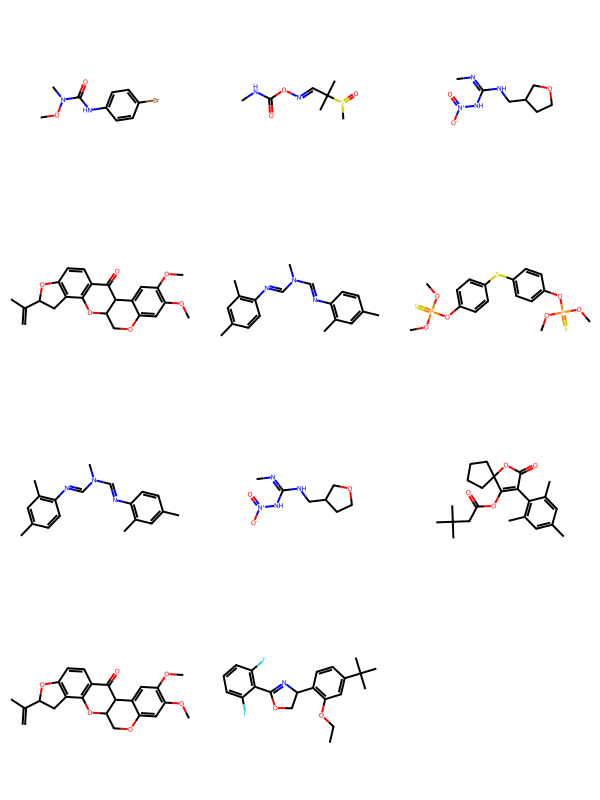

In [24]:
Draw.MolsToGridImage(mol_per_motif)